In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

Welcome to JupyROOT 6.22/02


In [2]:
file_pip = TFile.Open('3d_MR_piPlus.root')
file_pim = TFile.Open('3d_MR_piNegative.root')

In [3]:
file_pim.Print()

TFile: name=3d_MR_piNegative.root, title=, option=READ


In [23]:
y = {}
x = {} 
erry={}
for nubin in range(1,4):
    for q2bin in range (1,4):
        #Carbon
        data = file_pip.Get('g_q2_%i_nu_%i_C'%(q2bin,nubin))
        y['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)
        #Iron
        data = file_pip.Get('g_q2_%i_nu_%i_Fe'%(q2bin,nubin))
        y['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)
        #Lead
        data = file_pip.Get('g_q2_%i_nu_%i_Pb'%(q2bin,nubin))
        y['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        
        data = file_pim.Get('g_q2_%i_nu_%i_C'%(q2bin,nubin))
        y['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_Fe'%(q2bin,nubin))
        y['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_Pb'%(q2bin,nubin))
        y['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        

C_Q2_1bin_nu_1bin
C_Q2_2bin_nu_1bin
C_Q2_3bin_nu_1bin
C_Q2_1bin_nu_2bin
C_Q2_2bin_nu_2bin
C_Q2_3bin_nu_2bin
C_Q2_1bin_nu_3bin
C_Q2_2bin_nu_3bin
C_Q2_3bin_nu_3bin
[[0.19215686 0.50980392 0.74117647 1.        ]
 [0.99215686 0.55294118 0.23529412 1.        ]
 [0.63137255 0.85098039 0.60784314 1.        ]
 [0.85490196 0.85490196 0.92156863 1.        ]
 [0.85098039 0.85098039 0.85098039 1.        ]]


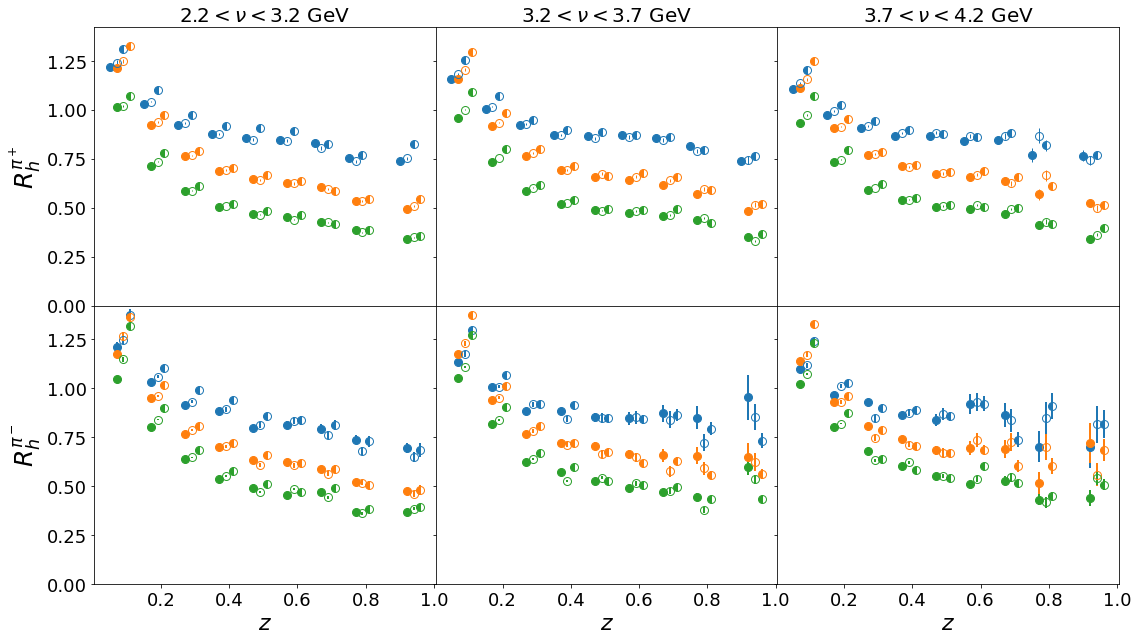

In [37]:
fig, axs = plt.subplots(2, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

q2bin = 1

q2label = {} 
q2label['bin_1'] = '$1.0<Q^{2}<1.3$ GeV$^{2}$' 
q2label['bin_2'] = '$1.3<Q^{2}<1.8$ GeV$^{2}$' 
q2label['bin_3'] = '$1.8<Q^{2}<4.1$ GeV$^{2}$' 

nulabel = {} 
nulabel['bin_1'] = r'$2.2<\nu<3.2$ GeV' 
nulabel['bin_2'] =  r'$3.2<\nu<3.7$ GeV' 
nulabel['bin_3'] =  r'$3.7<\nu<4.2$ GeV' 

colors = {}
#colors['C'] = 'red'
#colors['Fe'] = 'black'
#colors['Pb'] = 'blue'

#colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'left'

for nubin in range(1,4):
    for q2bin in range(1,4):
        print('C_Q2_%ibin_nu_%ibin'%(q2bin,nubin))
        
        ibin = 'pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        axs[0,nubin-1].errorbar(x[key]+0.02*(q2bin-1),y[key],yerr=erry[key],color=colors['C'],fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=1,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Fe_'+ibin
        axs[0,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color=colors['Fe'],fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=1,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Pb_'+ibin
        axs[0,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color=colors['Pb'],fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=1,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])

  
        ibin = 'pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        axs[1,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color=colors['C'],fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Fe_'+ibin
        axs[1,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color=colors['Fe'],fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Pb_'+ibin
        axs[1,nubin-1].errorbar(x[key]+0.02*q2bin,y[key],yerr=erry[key],color=colors['Pb'],fmt='o',fillstyle=marker['bin_%i'%q2bin],lw=2,alpha=1.0,ms=8,label=nulabel['bin_%i'%nubin])

        
        axs[1,nubin-1].xaxis.set_label_text('$z$',fontsize=22)
        axs[0,nubin-1].set_ylim([0.0,1.42])
        axs[1,nubin-1].set_ylim([0.0,1.42])
    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20)
    


    
axs[0,0].yaxis.set_label_text('$R_{h}^{\pi^+}$',fontsize=25)
axs[1,0].yaxis.set_label_text('$R_{h}^{\pi^-}$',fontsize=25)


plt.tight_layout()
plt.savefig('Multidifferential_Rh_pip_pim.pdf')
plt.savefig('Multidifferential_Rh_pip_pim.png')

print(color_list)

In [ ]:
plt.plot(x_arr,y_arr,'o')